# Rekha Meena
# @The Sparks Foundation
# Data Science & Business Analytics Intern



# Task-4 : Exploratory Data Analysis - Terrorism

# Problem Statement :
- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?
### Dataset: https://bit.ly/2TK5Xn5

# Exploratory Data Analysis(EDA)
We will explore a Data set and perform the exploratory data analysis. The major topics to be covered are below:

- Handle Missing value
- Removing duplicates
- Bivariate Analysis

In [1]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')




# Let's get started !!!
 Importing the required libraries for EDA

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette(pal)


#  Loading the data into the data frame.

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
# Checking the data type
df.dtypes


eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#  Dropping the duplicate rows

In [4]:
# Total number of rows and columns
df.shape

(181691, 135)

In [5]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 135)


In [21]:
# Used to count the number of rows before removing the data
df.count() 

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [4]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Let's just remove Id and the features with 50% or less NaN values.

In [5]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]
del df2['eventid']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: eventid, approxdate, resolution, location, alternative, alternative_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain2, guncertain3, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype2, weaptype2_txt, weapsubtype2, weapsubtype2_txt, weaptype3, weaptype3_txt, weapsubtype3, weapsubtype3_txt, weaptype4, weaptype4_txt, weapsubtype4, weapsubtype4_txt, propextent, propextent_txt, propvalue, propcomment, nhostkid, nhostkidus, nhours, ndays, divert, kidhijcountry, ransom, ransomamt, ransomamtus, ransompaid, ransompaidus, ransomnote, hostkidoutcome, hostkidoutcome_txt, nreleased, addnotes, scite2, scite3, related, 



In [41]:
df.shape

(181691, 57)

In [42]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

# Drop unnessasery columns

In [6]:
df.drop(['extended', 'country','region','specificity', 'vicinity', 'crit1', 'crit2', 'crit3','doubtterr', 'multiple', 'success', 'suicide', 'attacktype1','targtype1','targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',  'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed','weaptype1', 'weapdetail','nkillus', 'nkillter','nwoundus','nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY','weapsubtype1','weapsubtype1_txt' ],axis=1,inplace=True)

In [9]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'provstate', 'city',
       'latitude', 'longitude', 'Summary', 'AttackType', 'Target_type',
       'Group', 'Weapon_type', 'Killed', 'Wounded'],
      dtype='object')

In [7]:
# Rename the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','nkill':'Killed','targtype1_txt':'Target_type','nwound':'Wounded','summary':'Summary','gname':'Group','weaptype1_txt':'Weapon_type'},inplace=True)

#  Dropping the missing or null values.

In [10]:
# Finding the null values.
print(df.isnull().sum())

Year               0
Month              0
Day                0
Country            0
Region             0
provstate        421
city             434
latitude        4556
longitude       4557
Summary        66129
AttackType         0
Target_type        0
Group              0
Weapon_type        0
Killed         10313
Wounded        16311
dtype: int64


In [8]:
# Dropping the missing values.
df = df.dropna() 
df.count()


Year           105756
Month          105756
Day            105756
Country        105756
Region         105756
provstate      105756
city           105756
latitude       105756
longitude      105756
Summary        105756
AttackType     105756
Target_type    105756
Group          105756
Weapon_type    105756
Killed         105756
Wounded        105756
dtype: int64

In [49]:
# After dropping the values
print(df.isnull().sum())

Year           0
Month          0
Day            0
Country        0
Region         0
provstate      0
city           0
latitude       0
longitude      0
Summary        0
AttackType     0
Target_type    0
Group          0
Weapon_type    0
Killed         0
Wounded        0
dtype: int64


# To check Statistical Details of Dataset

In [50]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,105756,NaN,NaN,NaN,2011.53,5.92915,1970,2010,2013,2015,2017
Month,105756,NaN,NaN,NaN,6.46784,3.3824,1,4,6,9,12
Day,105756,NaN,NaN,NaN,15.5737,8.82077,0,8,15,23,31
Country,105756,170,Iraq,23064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,105756,12,Middle East & North Africa,38303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
provstate,105756,2119,Baghdad,7395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,105756,24970,Baghdad,7339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,105756,NaN,NaN,NaN,27.0435,13.2691,-42.884,18.5438,32.7826,34.3993,74.6336
longitude,105756,NaN,NaN,NaN,49.8733,39.9412,-157.858,37.7623,44.6486,71.0561,179.367
Summary,105756,103002,"09/00/2016: Sometime between September 18, 201...",100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization !!

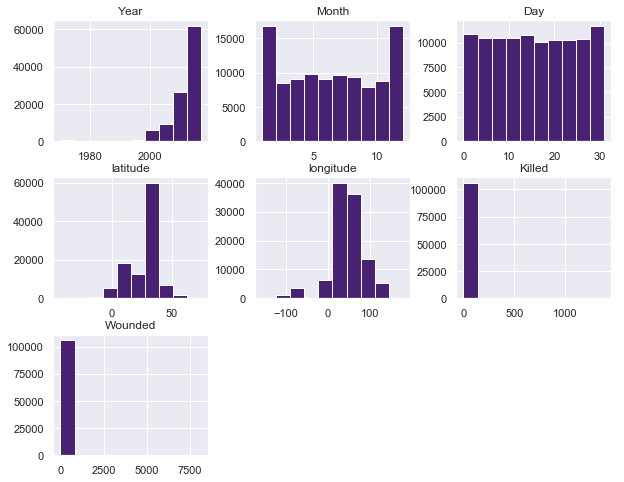

In [51]:
# Now lets plot them all:

df.hist(figsize=(10, 8)); # ; avoid having the matplotlib verbose informations

# Correlation

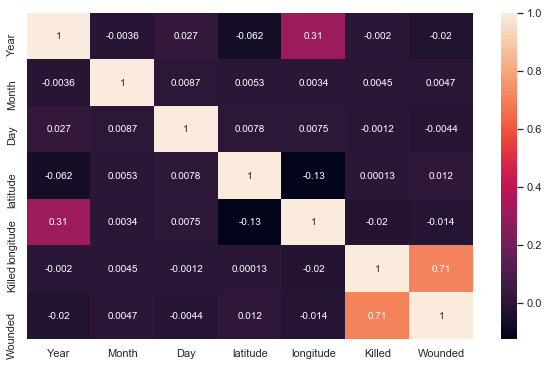

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)


# Analysing terrorist activities of each Group

In [9]:
freq_group_table = df.groupby(['Group']).size().reset_index(name='count').rename(columns={'Group':'Group'})
freq_group_table

,Group,count
0,14 K Triad,4
1,14 March Coalition,1
2,1920 Revolution Brigades,2
3,23 May Democratic Alliance (Algeria),3
4,28s,1
...,...,...
1596,Zintani Militia,1
1597,Zionist Resistance Fighters,1
1598,Zomi Revolutionary Army (ZRA),2
1599,Zuwar al-Imam Rida,1


# Analysing terrorist activities of each year 

Text(0.5,1,'Number Of Terrorist Activities of Each Year')

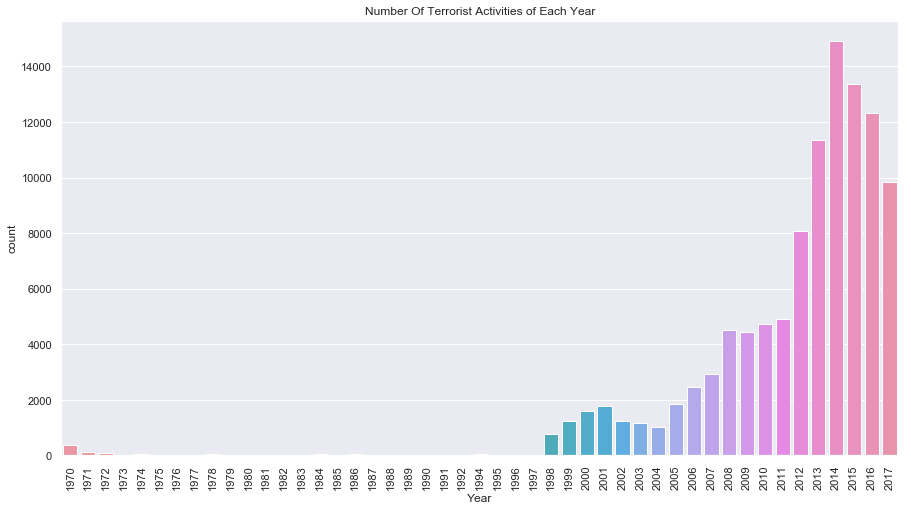

In [55]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities of Each Year')

#### OVERSERVATION :

- Countplot clearly show the number of attack is high in 2014
- after 2005 Number Of Terrorist Activities is exponataily incresed.

# Find the Target of terrorist attack.

Text(0.5,1,'Targets of Terrorists')

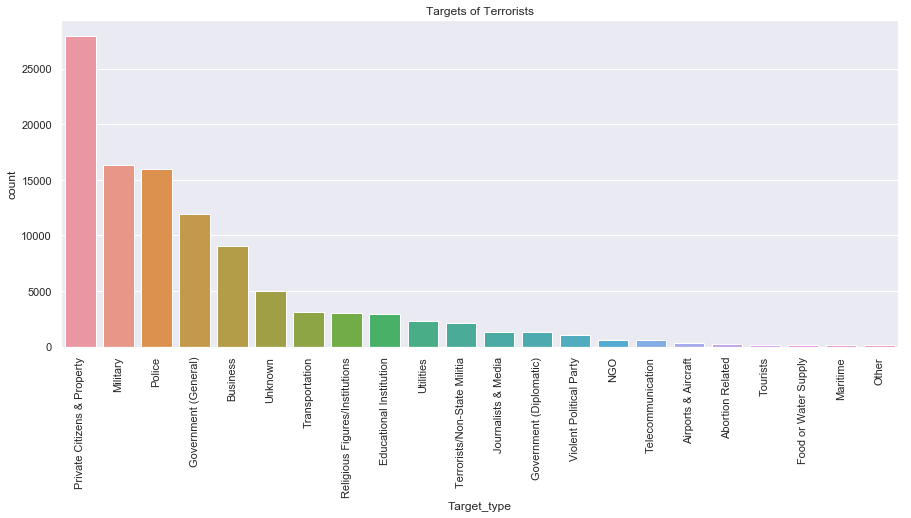

In [57]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Target_type'],order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets of Terrorists')

### OBSERVATION :
- Miximum attack on the Private Citizens and Properity.

# Analysing the Month for Terrorist attack.

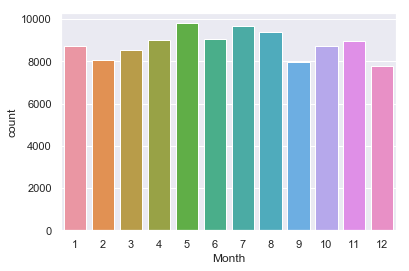

In [13]:
sns.countplot(data=df,x='Month')

### OBSERVATION :
- More Terrorist attack on May, and July. 

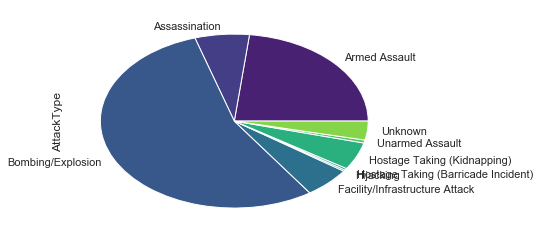

In [14]:
df.groupby('AttackType')['AttackType'].count().plot(kind='pie')

### OBSERVATION :
- Bombing/Explosion Terrorist Attack type is most common to all AttackType.

# Counts of Attacks vs Killed

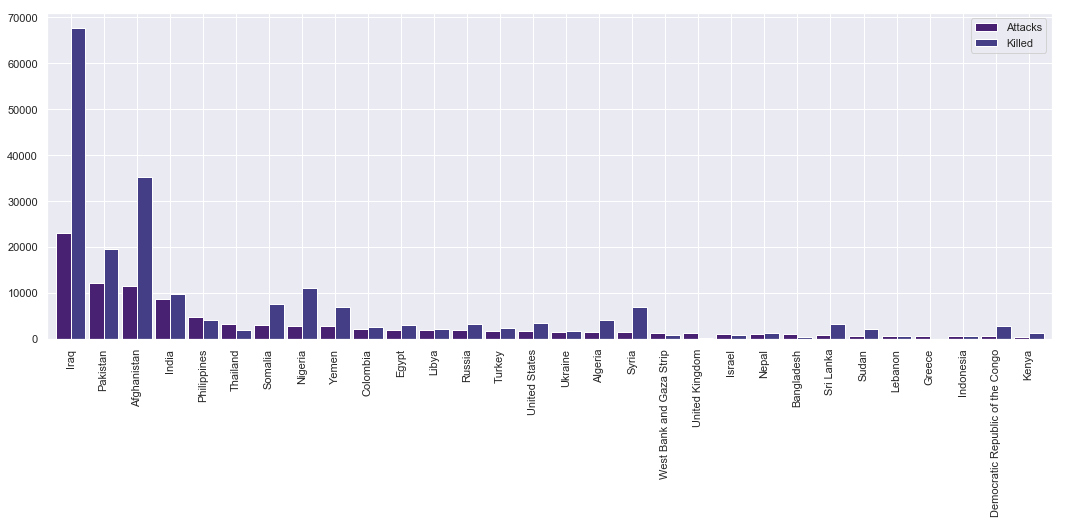

In [18]:
count=df['Country'].value_counts()[:30].to_frame()
count.columns=['Attacks']
count_kill=df.groupby('Country')['Killed'].sum().to_frame()
count.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)

# OBSERVATION :
- Iraq has More Attacks and Killed.

# Number Of Terrorist Attacks Per Region 

Text(0.5,1,'Number Of Terrorist Attacks Per Region')

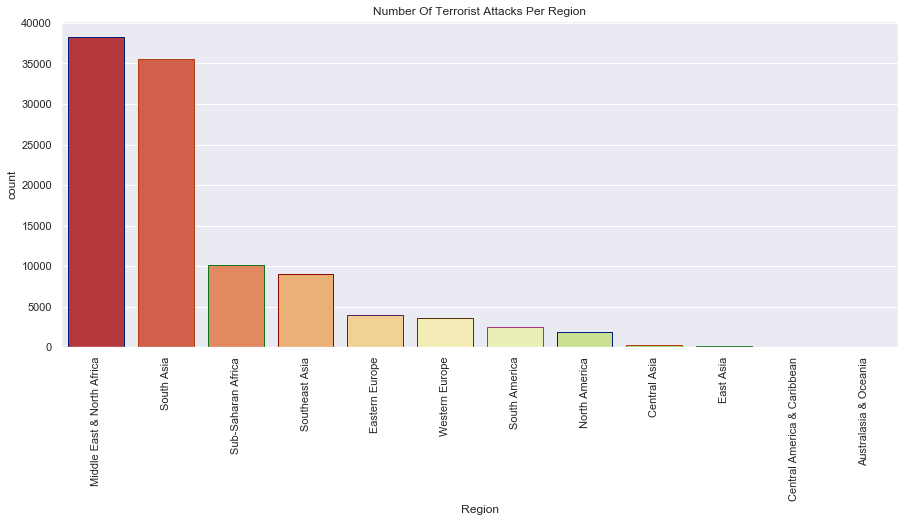

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Per Region')

### Observation :
- Middle East & North Africa has high Number Of Terrorist Attacks Per Region.
- South Asia is also having more number of Terrorist Attacks.

# Analyse Killed per day

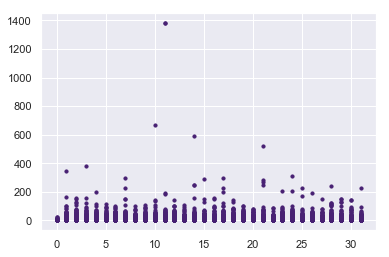

In [14]:
plt.scatter(x='Day', y='Killed', data=df, s=10)

# Weapon_type analyse by Pie chart

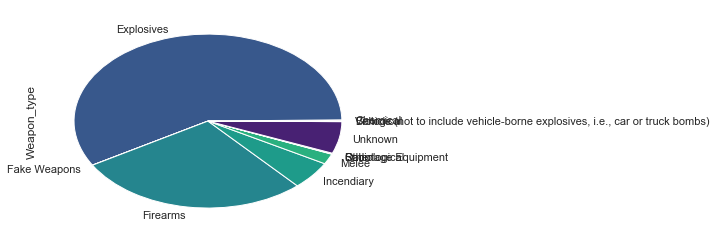

In [16]:
df.groupby('Weapon_type')['Weapon_type'].count().plot(kind='pie')

### OBSERVATION :
- The terrorist use the Explosives Weapon_type more compare to other weapon.

# CONCLUTION :

### As a security/defense analyst, try to find out the hot zone of terrorism.

##### Hot Zone of terrorism -

   1. Iraq has More Attacks and Ratio of Killed.
   2. The terrorist use the Explosives Weapon_type more compare to other weapon.
   3. Middle East & North Africa has high Number Of Terrorist Attacks Per Region.
   4. South Asia is also having more number of Terrorist Attacks.
   5. Bombing/Explosion Terrorist Attack type is most common to all AttackType.
   6. More Terrorist attack on May, and July.
   7. Miximum attack on the Private Citizens and Properity.
   8. The number of attack is high in 2014
   9. after 2005 Number Of Terrorist Activities is exponataily incresed.
   
#### What all security issues and insights you can derive by EDA?

- According to EDA we are find :
    - Middle East less security/defence so, commanly everyone think in the middle less dangore.
    - The Private Citizens and Properity are less secure. It is private properity so, goverment is not handle.
    